In [1]:
import pandas as pd
import plotly_express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as st
import datetime

In [2]:
price = pd.read_csv( "PricesFile1.csv")
price_wti=price[price['priceindex'].isin(['WTI NYMEX LIGHT SWEET'])]
price_wti

,priceindex,pricedate,delivdate,price
4070,WTI NYMEX LIGHT SWEET,2020/3/2,2020/3/1,53.779
4071,WTI NYMEX LIGHT SWEET,2020/3/2,2020/4/1,46.749
4072,WTI NYMEX LIGHT SWEET,2020/3/2,2020/5/1,46.919
4073,WTI NYMEX LIGHT SWEET,2020/3/2,2020/6/1,47.049
4074,WTI NYMEX LIGHT SWEET,2020/3/2,2020/7/1,47.139
4075,WTI NYMEX LIGHT SWEET,2020/3/2,2020/8/1,47.199
4076,WTI NYMEX LIGHT SWEET,2020/3/2,2020/9/1,47.249
4077,WTI NYMEX LIGHT SWEET,2020/3/2,2020/10/1,47.309
4078,WTI NYMEX LIGHT SWEET,2020/3/2,2020/11/1,47.399
4079,WTI NYMEX LIGHT SWEET,2020/3/2,2020/12/1,47.489


In [3]:
price_wti['pricedate'].unique()

array(['2020/3/2', '2020/3/3', '2020/3/4', '2020/3/5', '2020/3/6',
       '2020/3/9', '2020/3/10', '2020/3/11', '2020/3/12', '2020/3/13',
       '2020/3/16', '2020/3/17', '2020/3/18', '2020/3/19', '2020/3/20',
       '2020/3/23', '2020/3/24', '2020/3/25', '2020/3/26', '2020/3/27',
       '2020/3/30', '2020/3/31', '2020/4/1', '2020/4/2', '2020/4/3',
       '2020/4/6', '2020/4/7', '2020/4/8', '2020/4/9', '2020/4/13',
       '2020/4/14', '2020/4/15', '2020/4/16', '2020/4/17', '2020/4/20',
       '2020/4/21', '2020/4/22', '2020/4/23', '2020/4/24', '2020/4/27',
       '2020/4/28', '2020/4/29', '2020/4/30', '2020/5/1', '2020/5/4',
       '2020/5/5', '2020/5/6', '2020/5/7', '2020/5/8', '2020/5/11',
       '2020/5/12', '2020/5/13', '2020/5/14', '2020/5/15', '2020/5/18',
       '2020/5/19', '2020/5/20', '2020/5/21', '2020/5/22', '2020/5/26',
       '2020/5/27', '2020/5/28', '2020/5/29'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

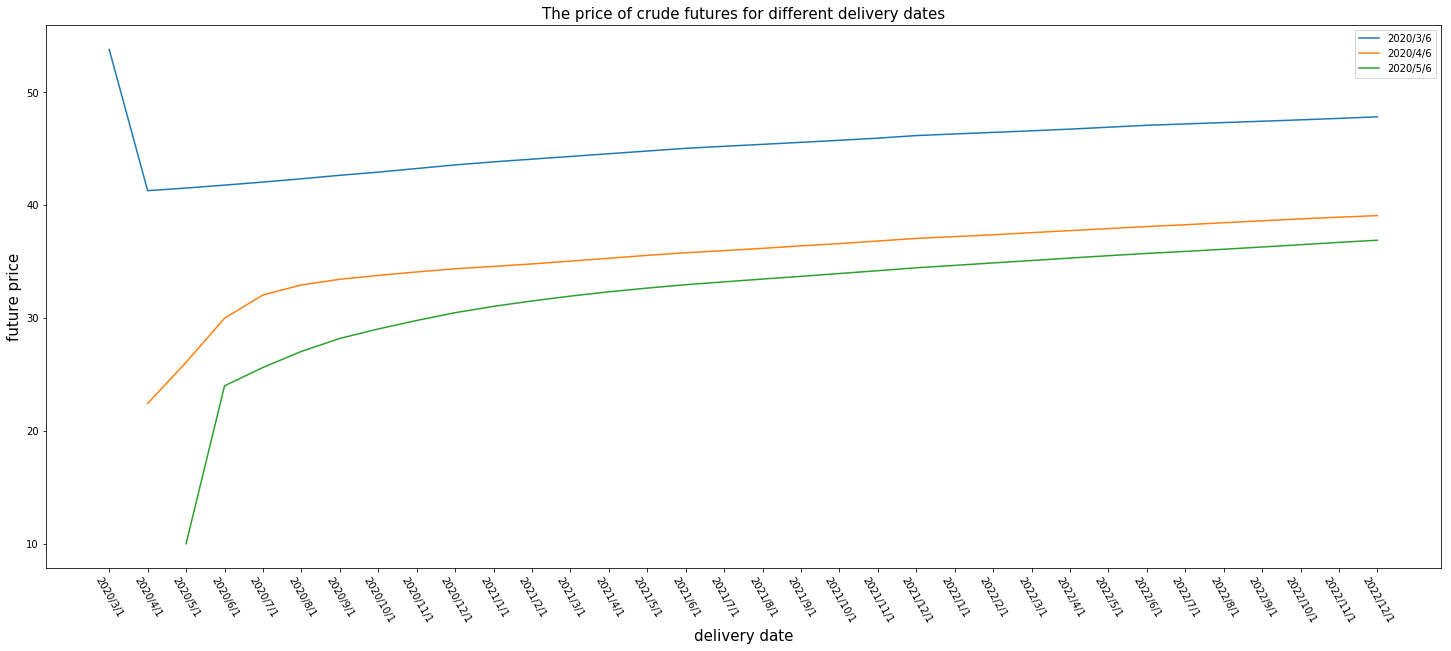

In [4]:
fig1=price_wti[price_wti['pricedate'].isin(['2020/3/6','2020/4/6','2020/5/6'])]
plt.rcParams['figure.figsize'] = (25,10)
for i in list(['2020/3/6','2020/4/6','2020/5/6']):
    plt.plot(fig1[fig1['pricedate']==i]['delivdate'], fig1[fig1['pricedate']==i]['price'], label=i)
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('The price of crude futures for different delivery dates',size=15)
plt.legend()
plt.xticks(rotation=300)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

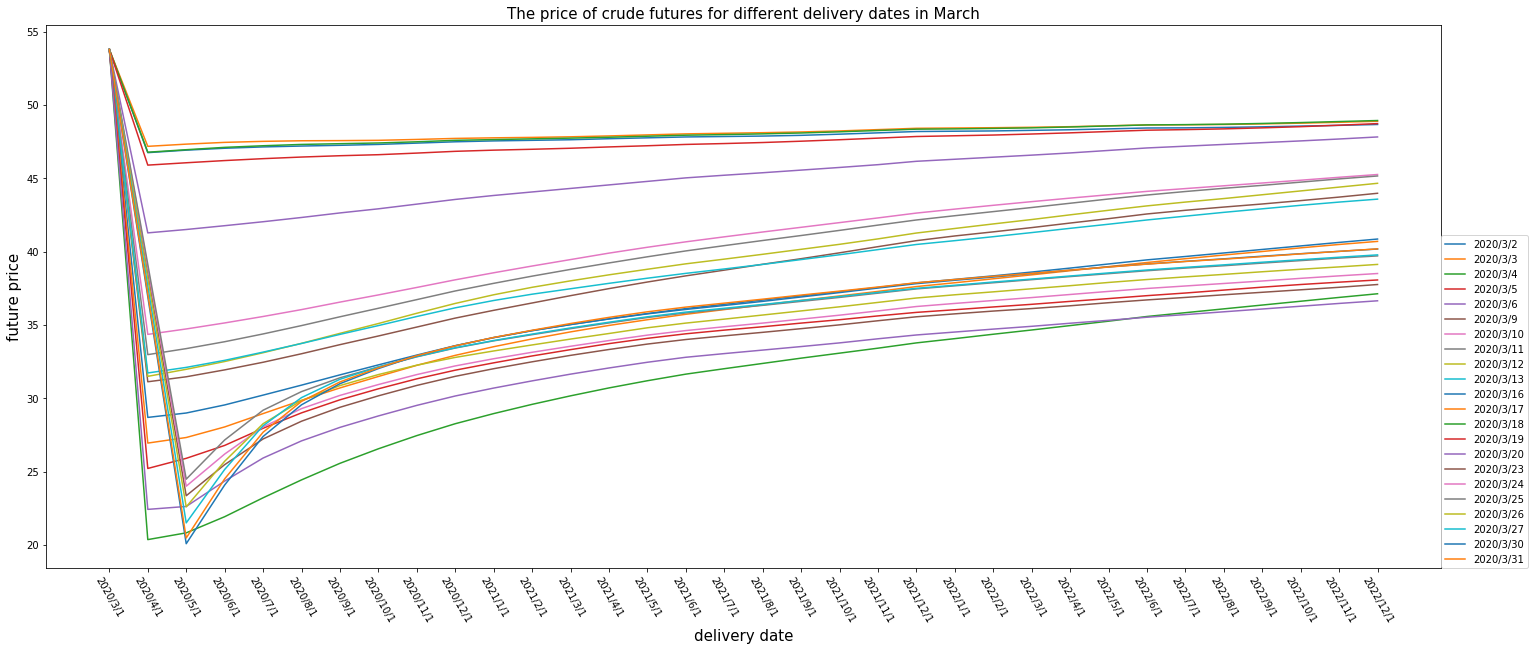

In [5]:
l=['2020/3/2', '2020/3/3', '2020/3/4', '2020/3/5', '2020/3/6',
       '2020/3/9', '2020/3/10', '2020/3/11', '2020/3/12', '2020/3/13',
       '2020/3/16', '2020/3/17', '2020/3/18', '2020/3/19', '2020/3/20',
       '2020/3/23', '2020/3/24', '2020/3/25', '2020/3/26', '2020/3/27',
       '2020/3/30', '2020/3/31']
fig2=price_wti[price_wti['pricedate'].isin(l)]
for i in list(l):
    plt.plot(fig2[fig2['pricedate']==i]['delivdate'], fig2[fig2['pricedate']==i]['price'], label=i)
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('The price of crude futures for different delivery dates in March',size=15)
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
plt.xticks(rotation=300)

In [6]:
#2020
data_2020 = pd.read_csv( "wti_2020_all.csv")
data_2020.head()

,priceindex,pricedate,delivdate,price,strikeprice,volatility,maturity,bidrate
0,WTI NYMEX LIGHT SWEET,2020/3/6,2020/11/1,43.239,25.0,0.475,7,0.541666
1,WTI NYMEX LIGHT SWEET,2020/3/6,2020/11/1,43.239,25.5,0.471,7,0.541666
2,WTI NYMEX LIGHT SWEET,2020/3/6,2020/11/1,43.239,26.0,0.467,7,0.541666
3,WTI NYMEX LIGHT SWEET,2020/3/6,2020/11/1,43.239,26.5,0.463,7,0.541666
4,WTI NYMEX LIGHT SWEET,2020/3/6,2020/11/1,43.239,27.0,0.458,7,0.541666


In [7]:
te=1 # 1 month before delivery date

In [8]:
#Black 76 
d1=(np.log(data_2020['price']/data_2020['strikeprice'])+data_2020['volatility']**2*(data_2020['maturity']-te)/2)/(data_2020['volatility']*np.sqrt(data_2020['maturity']-te))
d2=(np.log(data_2020['price']/data_2020['strikeprice'])-data_2020['volatility']**2*(data_2020['maturity']-te)/2)/(data_2020['volatility']*np.sqrt(data_2020['maturity']-te))
C_2020=np.exp(-data_2020['bidrate']/12/100*(data_2020['maturity']-te)**2)*(data_2020['price']*st.norm.cdf(d1)-data_2020['strikeprice']*st.norm.cdf(d2))
C_2020

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

invalid value encountered in sqrt

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning:

invalid value encountered in greater_equal



0      25.107323
1      24.787411
2      24.467284
3      24.146930
4      23.800639
         ...    
995    12.897499
996    12.691112
997    12.484536
998    12.277786
999    12.070882
Length: 1000, dtype: float64

In [9]:
P_2020=np.exp(-data_2020['bidrate']/12/100*(data_2020['maturity']-te)**2)*(data_2020['strikeprice']*st.norm.cdf(-d2)-data_2020['price']*st.norm.cdf(-d1))
P_2020

0       7.162311
1       7.334340
2       7.506153
3       7.677740
4       7.823390
         ...    
995    15.417176
996    15.710527
997    16.003688
998    16.296676
999    16.589510
Length: 1000, dtype: float64

In [10]:
#Bachelier model 
d=(data_2020['price']-data_2020['strikeprice'])/(data_2020['volatility']*np.sqrt(data_2020['maturity']-te))
C_2020_Ba=np.exp(-data_2020['bidrate']/12/100*(data_2020['maturity']-te)**2)*((data_2020['price']-data_2020['strikeprice'])*st.norm.cdf(d)+data_2020['volatility']*np.sqrt(data_2020['maturity']-te)*data_2020['strikeprice']*st.norm.pdf(d))
C_2020_Ba

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning:

invalid value encountered in less_equal



0      17.945012
1      17.453071
2      16.961130
3      16.469190
4      15.977249
         ...    
995     3.381411
996     1.685976
997     0.724852
998     0.266717
999     0.083345
Length: 1000, dtype: float64

In [11]:
#2021
data_2021 = pd.read_csv( "wti_2021_all.csv")
data_2021.head()

,priceindex,pricedate,delivdate,price,strikeprice,volatility,maturity,bidrate
0,WTI NYMEX LIGHT SWEET,2020/3/6,2021/8/1,45.379,45.0,0.272,16,0.540003
1,WTI NYMEX LIGHT SWEET,2020/3/6,2021/8/1,45.379,45.5,0.272,16,0.540003
2,WTI NYMEX LIGHT SWEET,2020/3/6,2021/8/1,45.379,46.0,0.272,16,0.540003
3,WTI NYMEX LIGHT SWEET,2020/3/6,2021/8/1,45.379,46.5,0.272,16,0.540003
4,WTI NYMEX LIGHT SWEET,2020/3/6,2021/8/1,45.379,47.0,0.271,16,0.540003


In [12]:
#Black 76
d1=(np.log(data_2021['price']/data_2021['strikeprice'])+data_2021['volatility']**2*(data_2021['maturity']-te)/2)/(data_2021['volatility']*np.sqrt(data_2021['maturity']-te))
d2=(np.log(data_2021['price']/data_2021['strikeprice'])-data_2021['volatility']**2*(data_2021['maturity']-te)/2)/(data_2021['volatility']*np.sqrt(data_2021['maturity']-te))
C_2021=np.exp(-data_2021['bidrate']/12/100*(data_2021['maturity']-te)**2)*(data_2021['price']*st.norm.cdf(d1)-data_2021['strikeprice']*st.norm.cdf(d2))
C_2021

0      16.572937
1      16.437320
2      16.303339
3      16.170965
4      15.984043
         ...    
995    10.043242
996     9.981674
997     9.920730
998     9.860399
999     9.800674
Length: 1000, dtype: float64

In [13]:
P_2021=np.exp(-data_2021['bidrate']/12/100*(data_2021['maturity']-te)**2)*(data_2021['strikeprice']*st.norm.cdf(-d2)-data_2021['price']*st.norm.cdf(-d1))
P_2021

0      16.230432
1      16.546669
2      16.864541
3      17.184020
4      17.448952
         ...    
995    39.161146
996    39.587136
997    40.013748
998    40.440975
999    40.868808
Length: 1000, dtype: float64

In [14]:
#2022
data_2022 = pd.read_csv( "wti_2022_all.csv")
data_2022.head()

,priceindex,pricedate,delivdate,price,strikeprice,volatility,maturity,bidrate
0,WTI NYMEX LIGHT SWEET,2020/3/2,2022/12/1,48.669,27.0,0.336,32,0.916666
1,WTI NYMEX LIGHT SWEET,2020/3/2,2022/12/1,48.669,27.5,0.333,32,0.916666
2,WTI NYMEX LIGHT SWEET,2020/3/2,2022/12/1,48.669,28.0,0.330,32,0.916666
3,WTI NYMEX LIGHT SWEET,2020/3/2,2022/12/1,48.669,28.5,0.327,32,0.916666
4,WTI NYMEX LIGHT SWEET,2020/3/2,2022/12/1,48.669,29.0,0.324,32,0.916666


In [15]:
#Black 76
d1=(np.log(data_2022['price']/data_2022['strikeprice'])+data_2022['volatility']**2*(data_2022['maturity']-te)/2)/(data_2022['volatility']*np.sqrt(data_2022['maturity']-te))
d2=(np.log(data_2022['price']/data_2022['strikeprice'])-data_2022['volatility']**2*(data_2022['maturity']-te)/2)/(data_2022['volatility']*np.sqrt(data_2022['maturity']-te))
C_2022=np.exp(-data_2022['bidrate']/12/100*(data_2022['maturity']-te)**2)*(data_2022['price']*st.norm.cdf(d1)-data_2022['strikeprice']*st.norm.cdf(d2))
C_2022

0      17.425610
1      17.289450
2      17.151807
3      17.012672
4      16.872037
         ...    
995    11.566204
996    11.511365
997    11.457008
998    11.403128
999    11.349717
Length: 1000, dtype: float64

In [16]:
P_2022=np.exp(-data_2022['bidrate']/12/100*(data_2022['maturity']-te)**2)*(data_2022['strikeprice']*st.norm.cdf(-d2)-data_2022['price']*st.norm.cdf(-d1))
P_2022

0       7.025816
1       7.129626
2       7.231952
3       7.332787
4       7.432121
         ...    
995    31.451428
996    31.786326
997    32.121708
998    32.457566
999    32.793894
Length: 1000, dtype: float64

In [17]:
def change_date(s):
    s = datetime.datetime.strptime(s, "%Y/%m/%d")  
    s = str(s)  
    return s[:10] 

In [18]:
# mean strikeprice and volatility at the same pricedate and delivdate
wti_2020=data_2020.groupby(['pricedate','delivdate']).mean()
wti_2020=wti_2020.reset_index()
wti_2020['pricedate'] = wti_2020['pricedate'].map(change_date) 
wti_2020['delivdate'] = wti_2020['delivdate'].map(change_date) 
wti_2020=wti_2020.sort_values(by=['pricedate','delivdate'], ascending=[True, True])
wti_2020

,pricedate,delivdate,price,strikeprice,volatility,maturity,bidrate
7,2020-03-04,2020-04-01,46.779,45.000000,0.562420,0,NaN
8,2020-03-04,2020-05-01,46.949,27.500000,0.750455,1,0.845001
10,2020-03-05,2020-04-01,45.899,45.000000,0.553469,0,NaN
11,2020-03-05,2020-05-01,46.059,45.000000,0.550951,1,0.805000
12,2020-03-05,2020-06-01,46.209,45.000000,0.484198,2,0.709999
13,2020-03-05,2020-07-01,46.339,45.000000,0.448457,3,0.669998
14,2020-03-05,2020-09-01,46.539,44.985185,0.383049,5,0.605003
9,2020-03-05,2020-10-01,46.609,35.500000,0.402233,6,0.589996
15,2020-03-06,2020-11-01,43.239,44.966667,0.369765,7,0.541666
16,2020-03-06,2020-12-01,43.559,27.500000,0.431273,8,0.553334


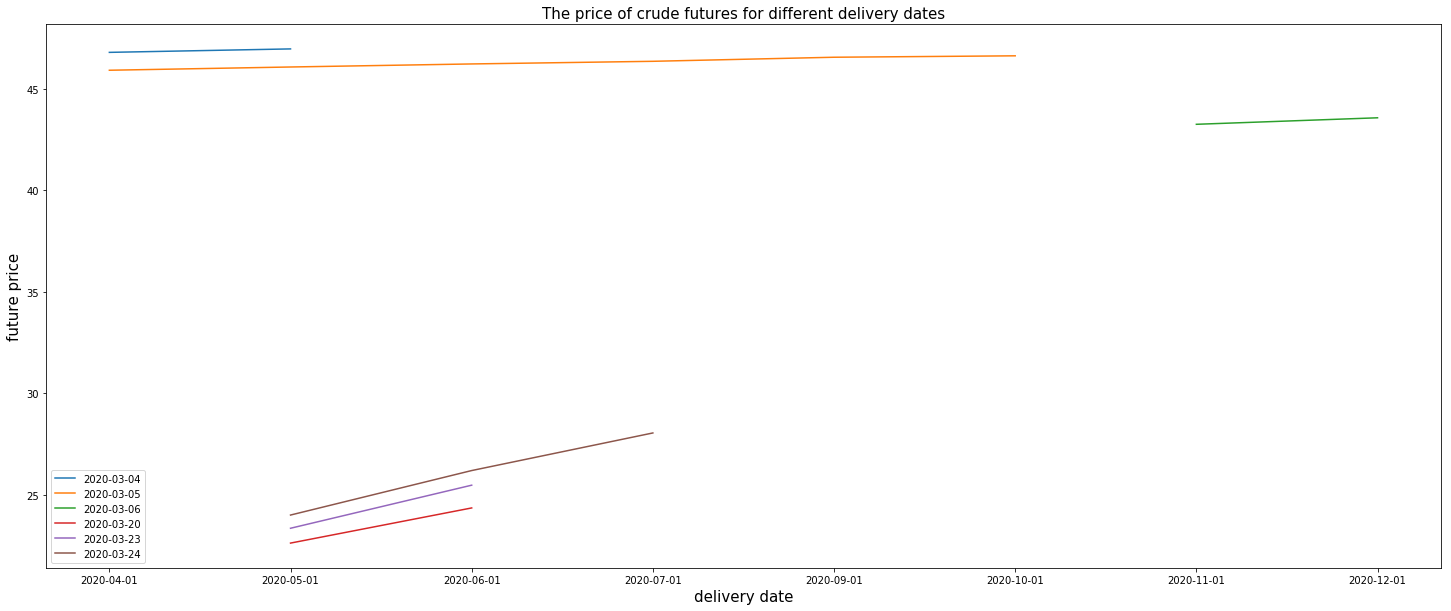

In [19]:
for i in list(wti_2020['pricedate'].unique()):
    plt.plot(wti_2020[wti_2020['pricedate']==i]['delivdate'], wti_2020[wti_2020['pricedate']==i]['price'], label=i)
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('The price of crude futures for different delivery dates',size=15)
plt.legend()

In [20]:
wti_2021=data_2021.groupby(['pricedate','delivdate']).mean()
wti_2021=wti_2021.reset_index()
wti_2021['pricedate'] = wti_2021['pricedate'].map(change_date) 
wti_2021['delivdate'] = wti_2021['delivdate'].map(change_date) 
wti_2021=wti_2021.sort_values(by=['pricedate','delivdate'], ascending=[True, True])
wti_2021

,pricedate,delivdate,price,strikeprice,volatility,maturity,bidrate
5,2020-03-05,2021-01-01,46.919,46.000000,0.303532,9,0.610001
7,2020-03-05,2021-02-01,46.979,48.250000,0.283588,10,0.591667
8,2020-03-05,2021-03-01,47.049,45.000000,0.289272,11,0.573333
9,2020-03-05,2021-04-01,47.139,48.400000,0.267182,12,0.555000
10,2020-03-05,2021-06-01,47.309,46.000000,0.263065,14,0.568331
11,2020-03-05,2021-08-01,47.439,47.250000,0.247400,16,0.578331
12,2020-03-05,2021-09-01,47.529,44.550000,0.245900,17,0.581665
6,2020-03-05,2021-12-01,47.849,35.250000,0.260059,20,0.608335
13,2020-03-06,2021-01-01,43.829,46.000000,0.337247,9,0.565002
15,2020-03-06,2021-02-01,44.069,48.250000,0.319456,10,0.546668


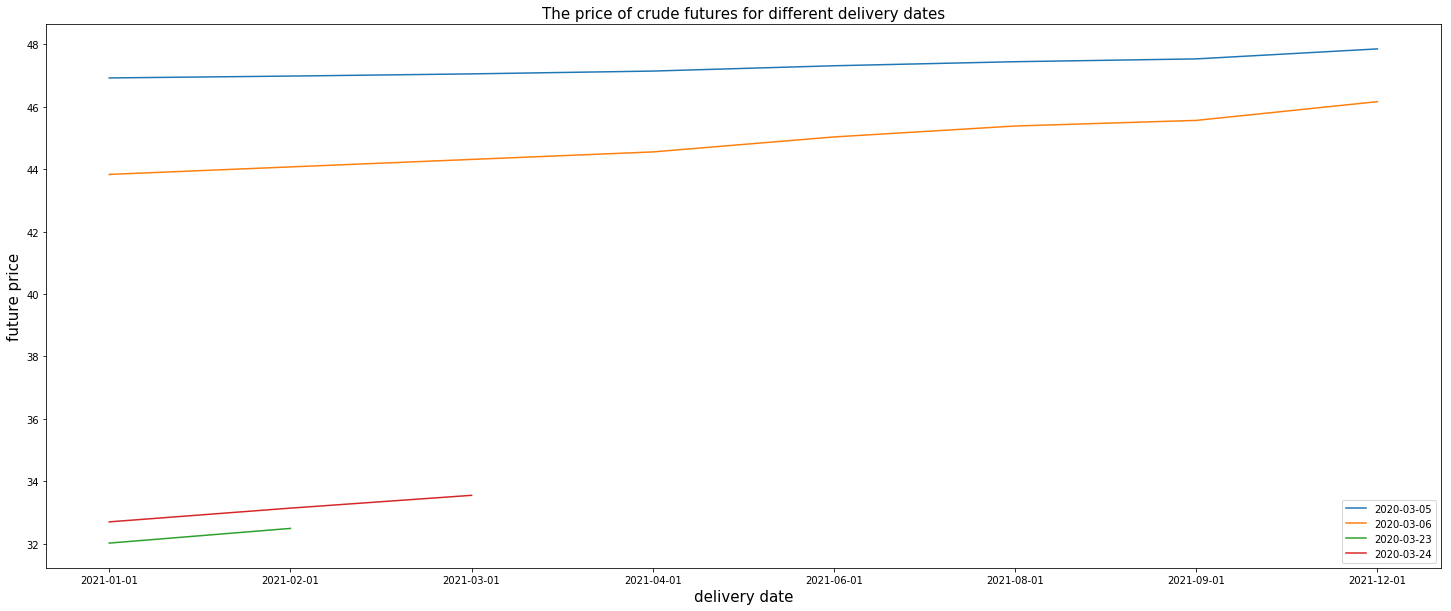

In [21]:
for i in list(wti_2021['pricedate'].unique()):
    plt.plot(wti_2021[wti_2021['pricedate']==i]['delivdate'], wti_2021[wti_2021['pricedate']==i]['price'], label=i)
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('The price of crude futures for different delivery dates',size=15)
plt.legend()

In [22]:
wti_2022=data_2022.groupby(['pricedate','delivdate']).mean()
wti_2022=wti_2022.reset_index()
wti_2022['pricedate'] = wti_2022['pricedate'].map(change_date) 
wti_2022['delivdate'] = wti_2022['delivdate'].map(change_date) 
wti_2022=wti_2022.sort_values(by=['pricedate','delivdate'], ascending=[True, True])
wti_2022

,pricedate,delivdate,price,strikeprice,volatility,maturity,bidrate
7,2020-03-02,2022-06-01,48.429,48.25,0.232588,26,0.850001
6,2020-03-02,2022-12-01,48.669,32.75,0.270167,32,0.916666
15,2020-03-03,2022-06-01,48.639,48.25,0.234956,26,0.768333
14,2020-03-03,2022-12-01,48.889,32.75,0.270792,32,0.831667
17,2020-03-04,2022-06-01,48.639,48.25,0.234044,26,0.726664
16,2020-03-04,2022-12-01,48.939,32.75,0.273167,32,0.805000
19,2020-03-05,2022-06-01,48.279,48.25,0.229309,26,0.668332
18,2020-03-05,2022-12-01,48.729,32.75,0.256000,32,0.745000
21,2020-03-06,2022-06-01,47.069,48.25,0.236809,26,0.628333
20,2020-03-06,2022-12-01,47.819,32.75,0.250958,32,0.691668


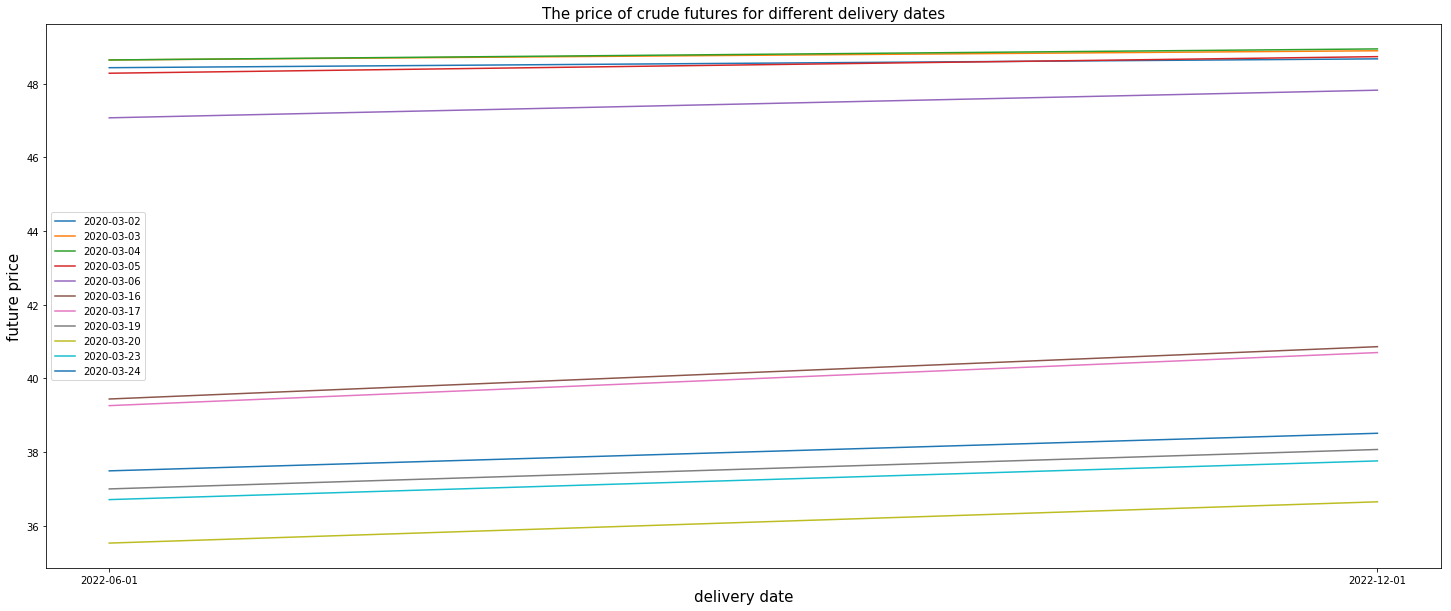

In [23]:
for i in list(wti_2022['pricedate'].unique()):
    plt.plot(wti_2022[wti_2022['pricedate']==i]['delivdate'], wti_2022[wti_2022['pricedate']==i]['price'], label=i)
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('The price of crude futures for different delivery dates',size=15)
plt.legend()

In [24]:
#Black 76 call option price(mean)
d1=(np.log(wti_2020['price']/wti_2020['strikeprice'])+wti_2020['volatility']**2*(wti_2020['maturity']-te)/2)/(wti_2020['volatility']*np.sqrt(wti_2020['maturity']-te))
d2=(np.log(wti_2020['price']/wti_2020['strikeprice'])-wti_2020['volatility']**2*(wti_2020['maturity']-te)/2)/(wti_2020['volatility']*np.sqrt(wti_2020['maturity']-te))
C_2020=np.exp(-wti_2020['bidrate']/12/100*(wti_2020['maturity']-te)**2)*(wti_2020['price']*st.norm.cdf(d1)-wti_2020['strikeprice']*st.norm.cdf(d2))
C_2020

7           NaN
8     19.449000
10          NaN
11     1.059000
12     9.335770
13    12.018652
14    14.325250
9     20.155191
15    14.322584
16    23.898513
0      0.000000
1     12.425583
2      0.000000
3     13.121337
4      0.000000
5      7.132008
6     14.288739
dtype: float64

In [26]:
d1=(np.log(wti_2021['price']/wti_2021['strikeprice'])+wti_2021['volatility']**2*(wti_2021['maturity']-te)/2)/(wti_2021['volatility']*np.sqrt(wti_2021['maturity']-te))
d2=(np.log(wti_2021['price']/wti_2021['strikeprice'])-wti_2021['volatility']**2*(wti_2021['maturity']-te)/2)/(wti_2021['volatility']*np.sqrt(wti_2021['maturity']-te))
C_2021=np.exp(-wti_2021['bidrate']/12/100*(wti_2021['maturity']-te)**2)*(wti_2021['price']*st.norm.cdf(d1)-wti_2021['strikeprice']*st.norm.cdf(d2))
C_2021

5     15.391289
7     14.468456
8     16.464948
9     14.871149
10    16.315606
11    15.722513
12    16.683304
6     20.571236
13    14.942370
15    14.432802
16    16.234812
17    14.582098
18    16.753633
19    15.885305
20    16.635355
14    20.063235
0     14.190660
1     16.590648
2     13.947942
3     13.188027
4     18.930691
dtype: float64

Text(0.5,1,'The simulated scenario for the Bachelier and Ornstein-Uhlenbeck process')

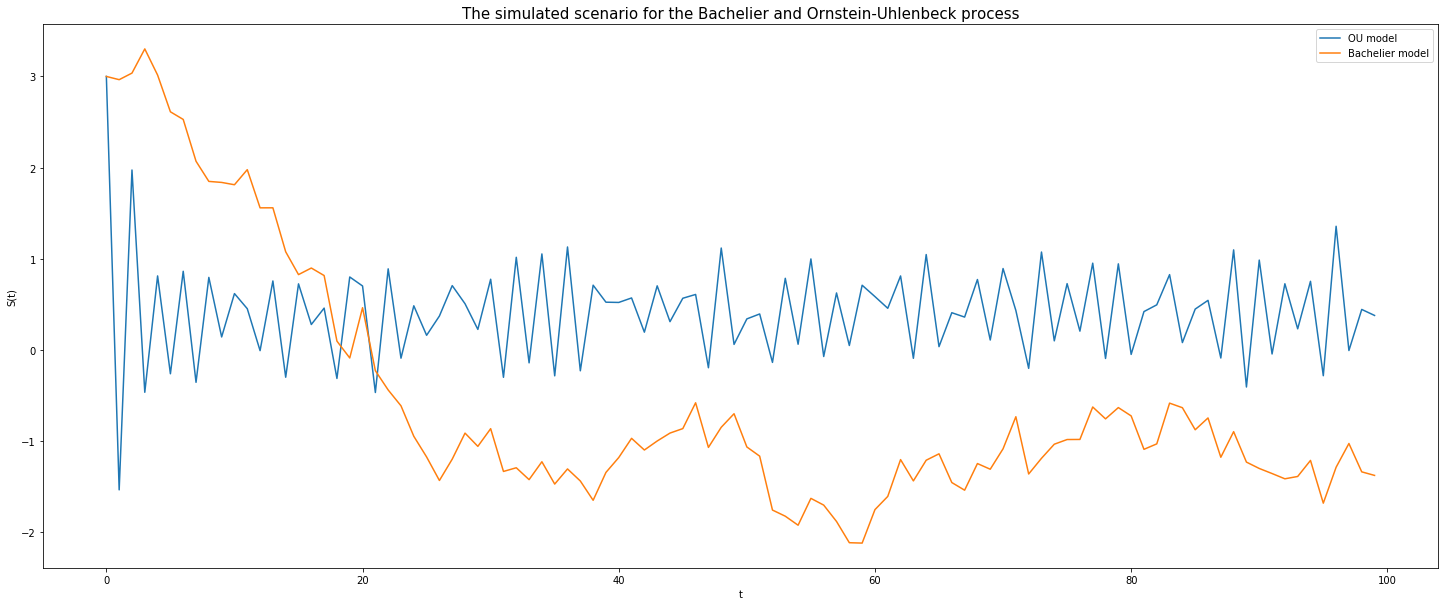

In [33]:
#Bachelier & OU model Simulation
S=3 * np.ones(100)
S1=3*np.ones(100)
lam=3.0
mu=1.0
sigma=0.5
delta_t=0.25
W=np.zeros(100)
for i in range(99):
    W[i+1]=W[i]+np.random.randn(1)*np.sqrt(delta_t)
    S[i+1]=lam*(mu-S[i])*delta_t+sigma*(W[i+1]-W[i])
    S1[i+1]=S1[0]+sigma*W[i+1]
plt.plot(S, label='OU model')
plt.plot(S1, label='Bachelier model')
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('The simulated scenario for the Bachelier and Ornstein-Uhlenbeck process',size=15)

Text(0.5,1,'sample paths by exact solution of the SDE')

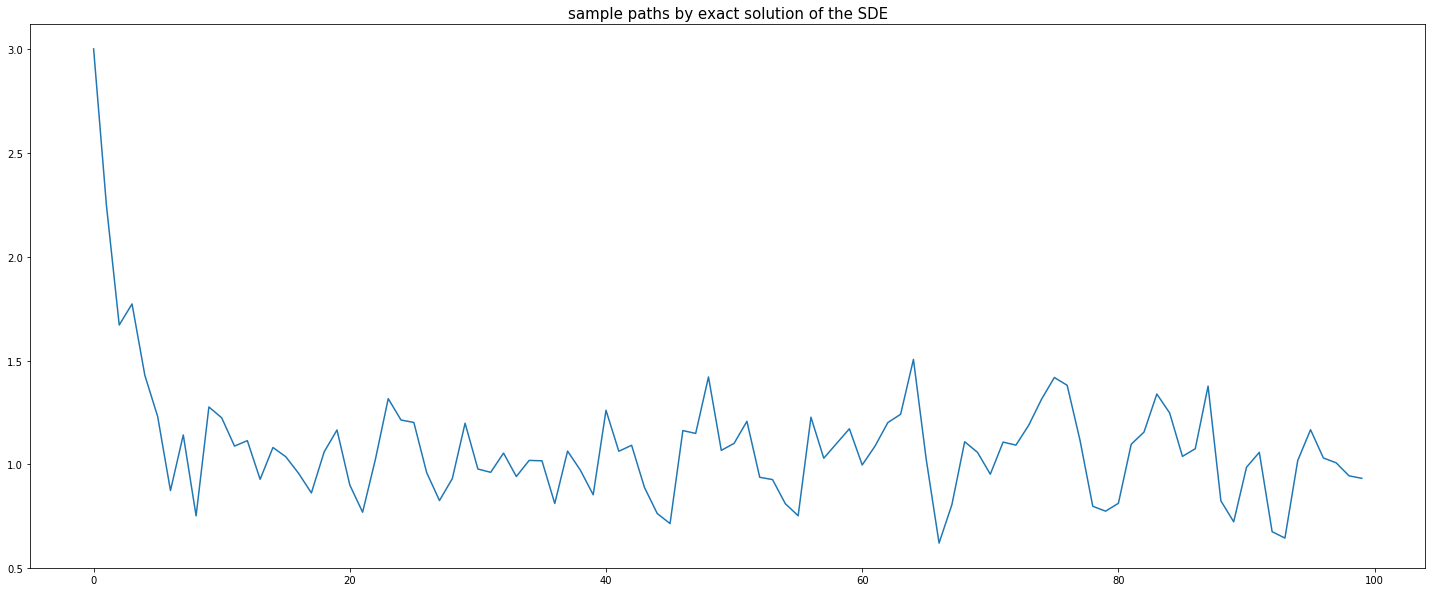

In [34]:
#OU model
S=3 * np.ones(100)
for i in range(99):
    S[i+1]=S[i]*np.exp(-lam*delta_t)+mu*(1-np.exp(-lam*delta_t))+sigma*np.sqrt((1-np.exp(-2*lam*delta_t))/2/lam)*np.random.randn(1)
plt.plot(S)
plt.title('sample paths by exact solution of the SDE',size=15)
    